In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [4]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [9]:
# load the dataset
dataframe = read_csv('Electric_Production.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [12]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [14]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
263/263 - 4s - loss: 0.0538 - 4s/epoch - 15ms/step
Epoch 2/100
263/263 - 0s - loss: 0.0176 - 464ms/epoch - 2ms/step
Epoch 3/100
263/263 - 1s - loss: 0.0150 - 519ms/epoch - 2ms/step
Epoch 4/100
263/263 - 1s - loss: 0.0127 - 514ms/epoch - 2ms/step
Epoch 5/100
263/263 - 0s - loss: 0.0109 - 464ms/epoch - 2ms/step
Epoch 6/100
263/263 - 0s - loss: 0.0096 - 481ms/epoch - 2ms/step
Epoch 7/100
263/263 - 0s - loss: 0.0089 - 487ms/epoch - 2ms/step
Epoch 8/100
263/263 - 1s - loss: 0.0085 - 518ms/epoch - 2ms/step
Epoch 9/100
263/263 - 0s - loss: 0.0081 - 475ms/epoch - 2ms/step
Epoch 10/100
263/263 - 1s - loss: 0.0081 - 505ms/epoch - 2ms/step
Epoch 11/100
263/263 - 1s - loss: 0.0079 - 538ms/epoch - 2ms/step
Epoch 12/100
263/263 - 0s - loss: 0.0081 - 481ms/epoch - 2ms/step
Epoch 13/100
263/263 - 1s - loss: 0.0080 - 799ms/epoch - 3ms/step
Epoch 14/100
263/263 - 2s - loss: 0.0080 - 2s/epoch - 6ms/step
Epoch 15/100
263/263 - 1s - loss: 0.0080 - 984ms/epoch - 4ms/step
Epoch 16/100
263/263 - 0

In [15]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

5/5 [==============================] - 0s 3ms/step


In [16]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [17]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 6.54 RMSE
Test Score: 8.76 RMSE


In [18]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [19]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

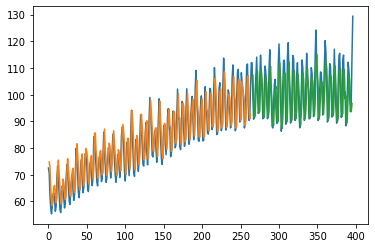

In [20]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()